In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Carga del archivo
df0 = pd.read_excel('../datas/Option_B/Balance Energetico resumido_DataConsolidada_Brasil_1970_2021_RMFP.xlsx')
df0=df0.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Imprime las primeras 5 filas de datos para confirmar que se ha leído correctamente
df0.columns
Year= df0["Año"]
Unit=df0["Unidad"]


In [103]:
df1=pd.read_excel('../datas/Option_B/Summarized enegy balance_Brazil_2021.xlsx', skiprows=range(2),skipfooter=1)


In [104]:
df=df0.drop(columns=['Año', 'Unidad'])
columns_1=df1.columns
columns=df.columns


In [105]:
df.columns = columns_1
df.rename(columns={'Unnamed: 0': 'Final Consumption'}, inplace=True)

In [106]:
#df.head()


In [107]:
#df1['Unnamed: 0']

In [108]:
# Create a dictionary with the mapping between the two columns
mapping = dict(zip(df['Final Consumption'].unique(),df1['Unnamed: 0']))

# Use the mapping to replace the values in 'Final Consumption' column of df
df['Final Consumption'] = df['Final Consumption'].replace(mapping)

# Replace 'Construcción y otros' by 'Constructuion and others
df['Final Consumption'] = df['Final Consumption'].replace('Construcción y otros', 'Construction and Others')
#Add the columns "Year" and Unit to the df

df["Year"]=Year
df["Unit"]=Unit

In [109]:
df.head(20)

,Final Consumption,T.S. Oil derivatives,T.S. Coke + T.S. charcoal,T.S. Oil,T.S. Natural gas,T.S. Coal,T.S. Hydroenergy,T.S. Nuclear,T.S. Other primaries,T.S. Electricity,S.T. Firewood,O.T. Sugarcane and products,Year,Unit
0,Total supply,24833.79,1869.52,25664.25,180.02,2235.39,3421.52,NaN,223.24,3930.52,31851.53,3600.70,1970,10³ tep
1,Charcoal + Coke plants,375.32,1707.43,NaN,NaN,1483.73,NaN,NaN,NaN,NaN,3493.85,NaN,1970,10³ tep
2,Power plants,1184.49,NaN,NaN,NaN,464.09,3421.52,NaN,81.16,3932.24,12.70,88.99,1970,10³ tep
3,Refineries,24598.32,55.18,25535.85,104.22,158.93,NaN,NaN,NaN,NaN,NaN,NaN,1970,10³ tep
4,"Agriculture, fishing and mining",403.70,19.37,NaN,NaN,NaN,NaN,NaN,NaN,27.25,4900.69,NaN,1970,10³ tep
5,"Commercial, services, public",277.95,32.29,NaN,NaN,NaN,NaN,NaN,NaN,749.88,206.69,NaN,1970,10³ tep
6,Industrial,1454.57,NaN,NaN,3.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,10³ tep
7,Non-energy consumption,5844.48,1100.99,NaN,3.16,67.13,NaN,NaN,142.09,1679.34,4124.14,3059.59,1970,10³ tep
8,Residential,1849.00,437.17,NaN,NaN,NaN,NaN,NaN,NaN,719.10,19070.39,NaN,1970,10³ tep
9,Transport,12548.10,NaN,NaN,NaN,15.11,NaN,NaN,NaN,55.71,43.07,NaN,1970,10³ tep


In [110]:
#Save df as excel
file_path = '../datas/Option_B/Datas_cleaned/Summarized enegy balance_Brazil_1970_2021.xlsx'
df.to_excel(file_path)


In [117]:
df_1970=df[df['Year']==1970]
df_1970.set_index("Final Consumption", inplace=True)
df_1970

,T.S. Oil derivatives,T.S. Coke + T.S. charcoal,T.S. Oil,T.S. Natural gas,T.S. Coal,T.S. Hydroenergy,T.S. Nuclear,T.S. Other primaries,T.S. Electricity,S.T. Firewood,O.T. Sugarcane and products,Year,Unit
Final Consumption,,,,,,,,,,,,,
Total supply,24833.79,1869.52,25664.25,180.02,2235.39,3421.52,NaN,223.24,3930.52,31851.53,3600.70,1970,10³ tep
Charcoal + Coke plants,375.32,1707.43,NaN,NaN,1483.73,NaN,NaN,NaN,NaN,3493.85,NaN,1970,10³ tep
Power plants,1184.49,NaN,NaN,NaN,464.09,3421.52,NaN,81.16,3932.24,12.70,88.99,1970,10³ tep
Refineries,24598.32,55.18,25535.85,104.22,158.93,NaN,NaN,NaN,NaN,NaN,NaN,1970,10³ tep
"Agriculture, fishing and mining",403.70,19.37,NaN,NaN,NaN,NaN,NaN,NaN,27.25,4900.69,NaN,1970,10³ tep
"Commercial, services, public",277.95,32.29,NaN,NaN,NaN,NaN,NaN,NaN,749.88,206.69,NaN,1970,10³ tep
Industrial,1454.57,NaN,NaN,3.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,10³ tep
Non-energy consumption,5844.48,1100.99,NaN,3.16,67.13,NaN,NaN,142.09,1679.34,4124.14,3059.59,1970,10³ tep
Residential,1849.00,437.17,NaN,NaN,NaN,NaN,NaN,NaN,719.10,19070.39,NaN,1970,10³ tep


In [124]:
tot_Sup = df_1970.loc[df_1970["Total supply"],2:-2].sum(axis=1)
tot_Sup

Final Consumption
Total supply                       71107.17
Charcoal + Coke plants              4977.58
Power plants                        8000.70
Refineries                         25799.00
Agriculture, fishing and mining     4927.94
Commercial, services, public         956.57
Industrial                             3.16
Non-energy consumption              9075.45
Residential                        19789.49
Transport                            113.89
dtype: float64

In [158]:
# Load the file
file_path = '../datas/Option_B/Brazil_Energy balance matrix.xlsx'
#File excel with multi-sheet_names is read as an Dictionary
Dict = pd.read_excel(file_path, sheet_name=None, skiprows=range(4), skipfooter=3)

#Create an empty list to save the keys of Dictionary:
keys=[]

for k in Dict.keys():   
    # Append the keys into list
    keys.append(k_new)
    
    # Round the values of each column in dataframe with 2 decimals
    Dict[k]=Dict[k].applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
    
    #Ignor the first row (unit) in each df
    Dict[k]=Dict[k][1:]
    
    #Rename of columns in df
    Dict[k].rename(columns={'Unnamed: 0': 'SECTOR','OTHER PRIMARY_x000d_\n':'OTHER PRIMARY'}, inplace=True)   
    
#print(Dict.keys())

# Convert the keys of Dict to only contain the year
for k in list(Dict.keys()):
    k_new = k.split(' - ')[0]
    Dict[k_new] = Dict.pop(k)
    
    Dict[k_new]["Year"]=k_new
        
print('\n')
print(Dict.keys())



#Save the Clean Dictionary in Excel with multi-sheet_names
file_path='../datas/Option_B/Datas_cleaned/Brazil_Energy balance matrix_cleaned.xlsx'
with pd.ExcelWriter(file_path) as writer:
    for k, df in Dict.items():
        df.to_excel(writer, sheet_name=k)

Dict['1970']




dict_keys(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])


,SECTOR,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,...,DIESEL OIL,FUEL OIL,COKE,CHARCOAL,GASES,OTHER SECONDARY,NON-ENERGY,TOTAL SECUNDARIES,TOTAL,Year
1,PRODUCTION,8161.58,1102.24,1044.43,3421.52,NaN,NaN,31851.53,3600.7,223.24,...,5674.61,8399.23,55.18,1766.75,465.95,321.73,886.77,31068.07,49405.24,1970
2,IMPORT,17845.05,NaN,1358.47,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,72.42,NaN,NaN,NaN,368.92,937.48,20141.01,1970
3,EXPORT,65.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.15,748.34,NaN,NaN,NaN,NaN,NaN,920.12,985.17,1970
4,STOCK CHANGE,-277.33,NaN,-167.52,NaN,NaN,NaN,NaN,NaN,NaN,...,-42.01,-69.03,-24.83,NaN,NaN,15.41,-53.93,-345.28,-790.13,1970
5,UNUSED,NaN,922.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,55.88,50.45,NaN,106.33,1028.54,1970
6,TOTAL SUPPLY,25664.25,180.02,2235.39,3421.52,NaN,NaN,31851.53,3600.7,223.24,...,5585.45,7581.86,102.77,1766.75,410.08,286.68,1201.77,30633.82,66742.4,1970
7,REFINERIES,-25535.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5674.61,8399.23,NaN,NaN,NaN,261.9,886.77,24421.51,-1114.34,1970
8,POWER PLANTS,NaN,NaN,-454.51,-3302.28,NaN,NaN,NaN,NaN,NaN,...,-115.74,-652.61,NaN,NaN,NaN,NaN,NaN,3613.39,-911.74,1970
9,SELF-PRODUCERS,NaN,NaN,-9.59,-119.23,NaN,NaN,-12.7,-88.99,-81.16,...,-77.16,-329.53,NaN,NaN,-9.46,NaN,NaN,318.85,-408.96,1970
10,GAS PLANTS,NaN,-104.22,-158.93,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,55.18,NaN,150.46,NaN,NaN,270.75,-31.18,1970


In [183]:
Dict1=Dict.copy()

for k in Dict1.keys():
    selected_columns = ['SECTOR', 'TOTAL PRIMARIES', 'TOTAL SECUNDARIES','NON-ENERGY', 'TOTAL','Year']
    Dict1[k]=Dict1[k][selected_columns]
    selected_rows=['TOTAL SUPPLY','TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict1[k]=Dict1[k][Dict1[k]['SECTOR'].isin(selected_rows)]
    # Concatenate all DataFrames in Dict vertically
    df_new = pd.concat(Dict1.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_new = pd.concat([df_new[last_column_name], df_new.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_new.set_index("Year", inplace=True)
    df_new.index = df_new.index.astype(int)
    
# Get the df "TOTAL SUPPLY"

df_TS=df_new.loc[df_new["SECTOR"]=="TOTAL SUPPLY"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TS='../datas/Option_B/Datas_cleaned/TTOTAL_SUPPLY_Brazil.xlsx'
df_TS.to_excel(file_TS)

# Get the df "TOTAL TRANSFORMATION"

df_TT=df_new.loc[df_new["SECTOR"]=="TOTAL TRANSFORMATION"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TT='../datas/Option_B/Datas_cleaned/TOTAL_TRANSFORMATION_Brazil.xlsx'
df_TT.to_excel(file_TT)

# Get the df "FINAL CONSUMPTION"

df_TC=df_new.loc[df_new["SECTOR"]=="FINAL CONSUMPTION"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TC='../datas/Option_B/Datas_cleaned/FINAL CONSUMPTION_Brazil.xlsx'
df_TC.to_excel(file_TC)


df_TS



,TOTAL PRIMARIES,TOTAL SECUNDARIES,NON-ENERGY,TOTAL
Year,,,,
1970,67176.64,30633.82,1201.77,66742.4
1971,69391.7,34509.96,1173.62,70092.03
1972,76197.42,38477.46,1238.57,75111.33
1973,83252.49,45191.03,1238.57,81963.44
1974,87620.68,50406.2,2002.12,87628.2
1975,92426.32,54094.59,2118.99,91211.72
1976,95862.67,59009.05,2267.92,95938.52
1977,99707.33,61194.93,2457.26,99416.35
1978,106543.83,67462.37,2976.05,105367.89


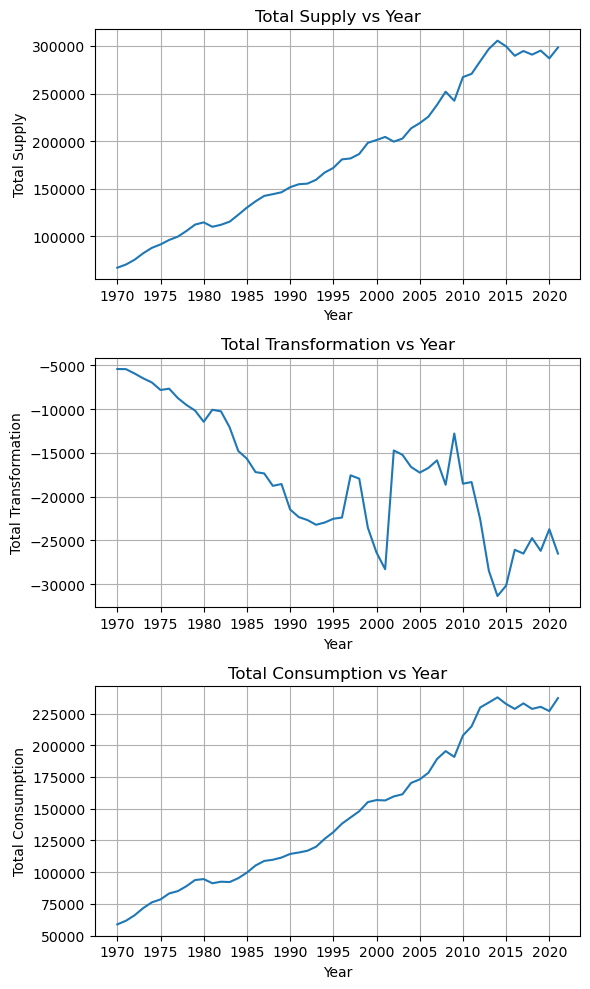

In [190]:
# Create a subplot with 3 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# Plot Total Supply
sns.lineplot(data=df_TS, x=df_TS.index, y='TOTAL', ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Supply')
axes[0].set_title('Total Supply vs Year')
axes[0].set_xticks(df_TS.index[::5])
axes[0].grid(True)

# Plot Total Transformation
sns.lineplot(data=df_TT, x=df_TT.index, y='TOTAL', ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Transformation')
axes[1].set_title('Total Transformation vs Year')
axes[1].set_xticks(df_TT.index[::5])
axes[1].grid(True)

# Plot Total Consumption
sns.lineplot(data=df_TC, x=df_TC.index, y='TOTAL', ax=axes[2])
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Total Consumption')
axes[2].set_title('Total Consumption vs Year')
axes[2].set_xticks(df_TC.index[::5])
axes[2].grid(True)

# Adjust layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


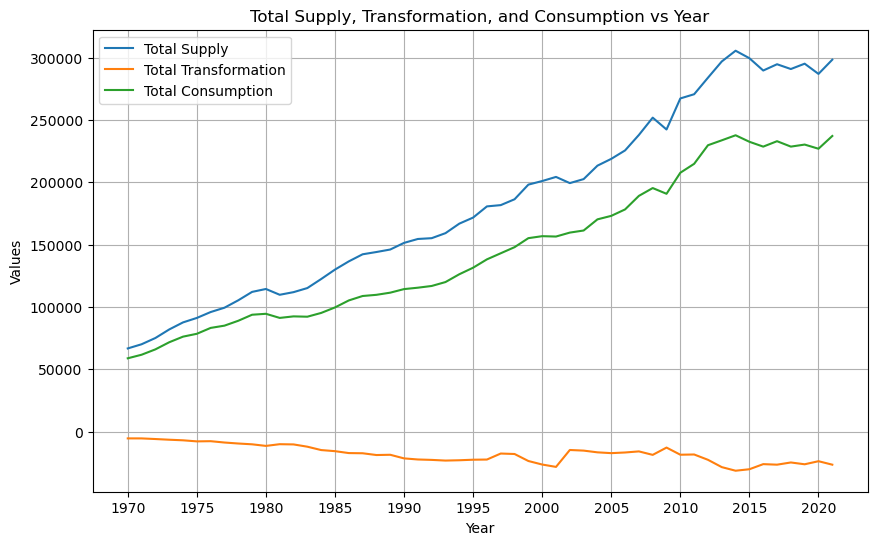

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have DataFrames named df_TS, df_TT, and df_TC, and each has "Year" as the index

# Create a figure and axis
fig, ax = plt.subplots(figsize=( 10,6))

# Plot Total Supply
sns.lineplot(data=df_TS, x=df_TS.index, y='TOTAL', label='Total Supply', ax=ax)

# Plot Total Transformation
sns.lineplot(data=df_TT, x=df_TT.index, y='TOTAL', label='Total Transformation', ax=ax)

# Plot Total Consumption
sns.lineplot(data=df_TC, x=df_TC.index, y='TOTAL', label='Total Consumption', ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Total Supply, Transformation, and Consumption vs Year')
ax.set_xticks(df_TS.index[::5])

# Show the legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Fuentes de energía (columnas "O.T. ...")
fuentes = ["PETRÓLEO", "GAS NATURAL", 
           "CARBÓN MINERAL", "HIDROENERGÍA", "NUCLEAR",
           "OTRAS PRIMARIAS", "LEÑA", "CAÑA DE AZÚCAR Y DERIVADOS"]

# Sectores de consumo (valores únicos en la columna "Consumo Final")
sectores = df_matriz["Consumo Final"].unique()

# Crear listas para guardar los datos del diagrama de Sankey
labels = list(fuentes) + ['REFINERÍAS', 'DESTILERÍA', 'CARBONERAS + CQ. Y A.HORNOS', 'Producción + Importación'] + list(sectores)
source = []  # índices de las fuentes
target = []  # índices de los destinos
value = []  # valores de los flujos
#print(labels)
# Fuentes que pasan por 'Refinerías', 'Destilerías' y 'Carboneras + Cq. y A.Hornos'
REFINERÍAS = ["PETRÓLEO", "GAS NATURAL", "OTRAS PRIMARIAS"]
DESTILERÍA = ["CAÑA DE AZÚCAR Y DERIVADOS", "OTRAS PRIMARIAS"]
CARBONERAS_CQ_AH = ["LEÑA", "CARBÓN MINERAL"]

# Llenar las listas source, target y value para los nodos de las fuentes a 'Refinerías', 'Destilerías', 'Carboneras + Cq. y A.Hornos' o 'Producción + Importación'
for i, fuente in enumerate(fuentes):
    valor = df_matriz.loc[(df_matriz["Consumo Final"] == "PRODUCCIÓN") | (df_matriz["Consumo Final"] == "IMPORTACIÓN"), fuente].sum()
    print(valor)
    if not np.isnan(valor):  # ignorar los valores NaN
        source.append(i)
        if fuente in REFINERÍAS:
            target.append(len(fuentes))  # el índice del nodo de 'Refinerías'
        elif fuente in DESTILERÍA:
            target.append(len(fuentes) + 1)  # el índice del nodo de 'Destilerías'
        elif fuente in CARBONERAS_CQ_AH:
            target.append(len(fuentes) + 2)  # el índice del nodo de 'Carboneras + Cq. y A.Hornos'
        else:
            target.append(len(fuentes) + 3)  # el índice del nodo de 'Producción + Importación'
        value.append(valor)

# Llenar las listas source, target y value para los nodos de 'Refinerías', 'Destilerías' y 'Carboneras + Cq. y A.Hornos' a 'Producción + Importación'
for i, nodo_intermedio in enumerate(['REFINERÍAS', 'DESTILERÍA', 'CARBONERAS + CQ. Y A.HORNOS'], start=len(fuentes)):
    valor = sum(value[j] for j in range(len(source)) if target[j] == i)
    if not np.isnan(valor):  # ignorar los valores NaN
        source.append(i)
        target.append(len(fuentes) + 3)  # el índice del nodo de 'Producción + Importación'
        value.append(valor)

# Llenar las listas source, target y value para los nodos de 'Producción + Importación' a los sectores
for j, sector in enumerate(sectores):
    if sector not in ['PRODUCCIÓN', 'IMPORTACIÓN']:  # ignorar las filas de 'Producción' e 'Importación'
        valor = df_matriz.loc[df_matriz["Consumo Final"] == sector, fuentes].sum().sum()  # sumar todos los valores para este sector
        if not np.isnan(valor):  # ignorar los valores NaN
            source.append(len(fuentes) + 3)  # el índice del nodo de 'Producción + Importación'
            target.append(len(fuentes) + j + 4)  # los índices de los destinos empiezan después del índice de 'Producción + Importación'
            value.append(valor)

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = "blue"
    ),
    link = dict(
        source = source,
        target = target,
        value = value
    )
)])

fig.update_layout(title_text="Flujo de energía en Brasil en 2021", font_size=10)
fig.show()

In [ ]:
print(labels)

In [ ]:
print(value)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Your provided DataFrame (replace this with your actual DataFrame)
data = {
    'Sector': ['Total supply', 'Charcoal + Coke plants', 'Power plants', 'Refineries', 'Agriculture, fishing and mining',
               'Commercial, services, public', 'Industrial', 'Non-energy consumption', 'Residential', 'Transport'],
    'T.S. Oil derivatives': [133991.0034, 779.919147, 4836.06293, 103076.9073, 7824.915344, 729.0477664, 10479.3774, 13021.03089, 6507.294831, 83101.32841],
    'T.S. Coke + T.S. charcoal': [11839.95104, 10782.29083, 0, 0, 41.58768666, 76.99332425, 11210.49205, 0, 411.7171183, 0],
    'T.S. Oil': [93340.78395, 0, 17485.03836, 93286.20184, 0, 0, 0, 215.9431763, 454.9729604, 1903.19675],
    'T.S. Natural gas': [36350.92151, 7849.84076, 4405.451064, 2583.619259, 261.0762247, 136.7667205, 8417.906755, 0, 0, 0],
    'T.S. Coal': [15917.20896, 0, 31125.0116, 0, 146.1086291, 0, 3497.419671, 0, 0, 0],
    'T.S. Hydroenergy': [31125.0116, 0, 3835.74802, 5589.695694, 0, 0, 0, 716.9382616, 0, 171.5741634],
    'T.S. Nuclear': [3835.74802, 7346.026023, 12826.83057, 0, 3998.099243, 176.9068438, 8568.383586, 12908.60572, 0, 0],
    'T.S. Other primaries': [28037.31631, 0, 56285.46393, 0, 3149.898631, 11346.64162, 17209.25268, 7422.223066, 0, 0],
    'T.S. Electricity': [58267.37059, 7346.026023, 429.4832245, 0, 0, 81.98516279, 7588.335697, 0, 0, 0],
    'S.T. Firewood': [26017.9518, 0, 5782.778991, 49469.74218, 0, 0, 15418.49655, 0, 0, 0],
    'O.T. Sugarcane and products': [49469.74218, 0, 78.46887779, 0, 0, 0, 0, 0, 0, 0]
}

# Create a DataFrame with the appropriate format for the Sankey diagram
df_sankey = pd.DataFrame(data)

# Create a list of all unique sectors including the Total supply
sectors = df_sankey['Sector'].tolist()

# Initialize lists to store the source, target, and value data for the Sankey diagram
source_indices = []
target_indices = []
values = []

# Loop through the DataFrame to extract the data for the Sankey diagram
for idx, col in enumerate(df_sankey.columns[1:]):
    for i, sector in enumerate(sectors):
        source_indices.append(idx)
        target_indices.append(i)
        values.append(df_sankey[col][i])

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=sectors
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
)])

# Customize the layout (optional)
fig.update_layout(
    title_text="Energy Flow in Brazil",
    font=dict(size=10),
)

# Show the Sankey diagram
fig.show()